In [19]:
!pip install pandas matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline
sns.set(style="whitegrid")


# ডেটা লোড 

In [ ]:
df = pd.read_csv('insurance.csv')


## ডেটা দেখবো


In [21]:


display(df.head())
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nBasic stats:")
display(df.describe())


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Basic stats:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# charges distribution


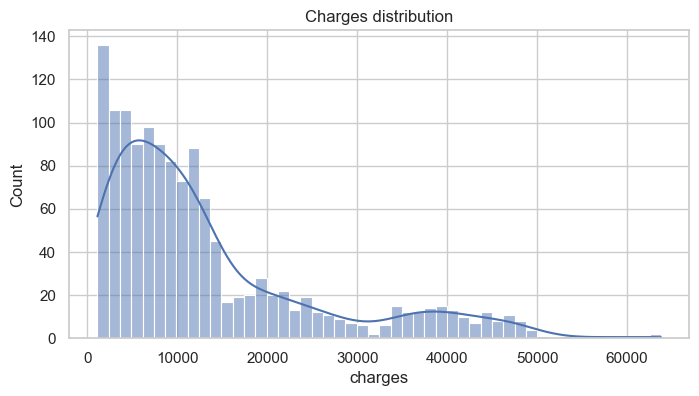

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Charges distribution')
plt.show()


# smoker vs charges boxplot


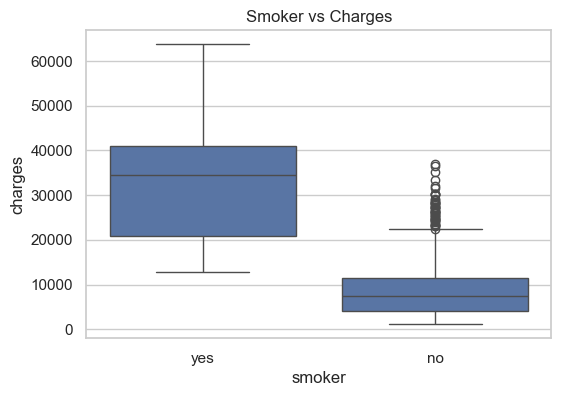

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()


# age vs charges scatter


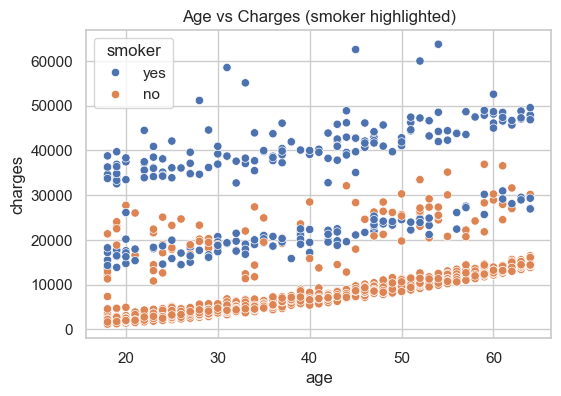

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Charges (smoker highlighted)')
plt.show()


# correlation heatmap for numeric cols


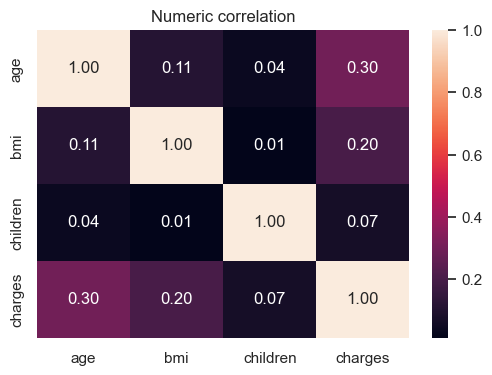

In [25]:
num_cols = ['age','bmi','children','charges']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
plt.title('Numeric correlation')
plt.show()


# duplicate চেক ও drop


In [26]:
print("Before duplicates:", len(df))
df = df.drop_duplicates()
print("After duplicates:", len(df))

Before duplicates: 1338
After duplicates: 1337


# যদি rare category খুব কম হয়ে থাকে তাদের কনসোলিডেট করার দরকার আছে কিনা চেক করো


In [27]:
print(df['region'].value_counts())
print(df['sex'].value_counts())
print(df['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64


X and Y defined

In [29]:
X = df.drop('charges', axis=1)
y = df['charges']


### ডেটাসেট ভাগ করা

এই কোডে `train_test_split` ব্যবহার করে বৈশিষ্ট্য (`X`) এবং লক্ষ্য (`y`) ডেটাকে ট্রেনিং ও টেস্টিং সেটে ভাগ করা হয়েছে। ৭০% ডেটা ট্রেনিংয়ের জন্য এবং ৩০% ডেটা টেস্টিংয়ের জন্য ব্যবহৃত হয়। `random_state=42` ব্যবহার করার ফলে প্রতিবার একইভাবে ডেটা ভাগ হবে।

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### ১. `pd.get_dummies(X_train, drop_first=True)`
- `X_train` ডেটাসেটের **categorical কলামগুলো** কে **one-hot encoding** করা হচ্ছে।
- `drop_first=True` দেওয়ার কারণে প্রথম ক্যাটাগরিকে বাদ দেওয়া হচ্ছে (dummy variable trap এড়ানোর জন্য)।

### ২. `pd.get_dummies(X_test, drop_first=True)`
- একইভাবে `X_test` ডেটাসেটের categorical কলামগুলোও one-hot encoding করা হচ্ছে।

### ৩. `X_test = X_test.reindex(columns=X_train.columns, fill_value=0)`
- `X_train` আর `X_test` এর কলামগুলো সমান না-ও হতে পারে (কারণ কিছু ক্যাটাগরি train ডেটাতে আছে কিন্তু test ডেটাতে নাই, বা উল্টোটা)।
- তাই `X_test` এর কলামগুলোকে `X_train.columns` অনুযায়ী **reindex** করা হচ্ছে।
- যেসব কলাম `X_test` এ নাই, সেগুলোকে **fill_value=0** দিয়ে পূরণ করা হচ্ছে।
- ফলে `X_train` আর `X_test` এর ফিচার কলামগুলো একরকম হয়ে যায়, যা মডেল ট্রেনিং আর প্রেডিকশনের জন্য খুবই জরুরি।

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


### ১. `from sklearn.ensemble import RandomForestRegressor`
- `scikit-learn` লাইব্রেরি থেকে **Random Forest Regressor** মডেলটি ইমপোর্ট করা হচ্ছে।
- এটি একটি **ensemble learning algorithm**, যেটা অনেকগুলো decision tree তৈরি করে এবং তাদের গড় (average) ফলাফল দেয়।

---

### ২. 
`
model = RandomForestRegressor(random_state=42)`
এখানে একটি RandomForestRegressor অবজেক্ট তৈরি করা হয়েছে।

random_state=42 সেট করার মানে হলো প্রতিবার একই রকম ফলাফল পেতে র‍্যান্ডম সংখ্যা ফিক্সড রাখা।

### ৩.


`model.fit(X_train, y_train)`
X_train (ফিচার ডেটা) এবং y_train (টার্গেট ভেরিয়েবল) ব্যবহার করে মডেলটি ট্রেন করা হচ্ছে।

অর্থাৎ, মডেল শিখে নিচ্ছে কিভাবে ইনপুট ফিচার থেকে আউটপুট প্রেডিক্ট করতে হয়।

### ৪.


`y_pred = model.predict(X_test)`
X_test এর উপর প্রেডিকশন করা হচ্ছে।

আউটপুট হিসেবে y_pred পাওয়া যাবে, যেখানে প্রতিটি রো এর জন্য প্রেডিক্টেড ভ্যালু থাকবে।

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## MSE , RMSE 

## 📊 মডেল পারফরম্যান্স মেট্রিক্স 

### ১. RMSE (Root Mean Squared Error)
- RMSE মানে হলো আসল ভ্যালু আর প্রেডিক্টেড ভ্যালুর মধ্যে গড় **ত্রুটি (error)** কতটা।
- এটি সব error গুলোকে স্কোয়ার করে, তারপর গড় বের করে, শেষে তার **বর্গমূল (√)** নেয়।
- মান যত ছোট হবে, মডেল তত ভালো প্রেডিক্ট করছে।
- উদাহরণ:
  - RMSE = 100 মানে হলো গড়ে প্রেডিকশনে প্রায় **100 ইউনিট ত্রুটি** হচ্ছে।

---

### ২. R² Score (Coefficient of Determination)
- R² score বলে দেয় মডেল আসল ডেটার **variance (বিভিন্নতা)** কতটা ভালোভাবে বুঝাতে পারছে।
- এর মান 0 থেকে 1 এর মধ্যে থাকে (কখনও নেগেটিভও হতে পারে):
  - **R² = 1.0 → একদম পারফেক্ট মডেল**
  - **R² = 0.0 → মডেল কিছুই শিখেনি (baseline এর সমান)**
  - **R² < 0 → মডেল এলোমেলোভাবে প্রেডিক্ট করছে**

---

✅ **সংক্ষেপে**  
- **RMSE → প্রেডিকশন কতটা ভুল করছে (error এর পরিমাণ)।**  
- **R² → মডেল আসল ডেটা কতটা ভালোভাবে explain করছে।**


In [ ]:
from sklearn.metrics import mean_squared_error



mse = mean_squared_error(y_test, y_pred)


rmse = np.sqrt(mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 4831.400050734648
R2 Score: 0.8635884812544394


# Feature importance পাওয়া
# Features-এর নামগুলো
# DataFrame বানানো

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


importance = model.feature_importances_


features = X_train.columns


feat_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

print(feat_importance)


            Feature  Importance
4        smoker_yes    0.605774
1               bmi    0.209188
0               age    0.140647
2          children    0.021728
3          sex_male    0.006876
6  region_southeast    0.006482
5  region_northwest    0.005552
7  region_southwest    0.003753


 # সবচেয়ে important উপরে দেখানোর জন্য

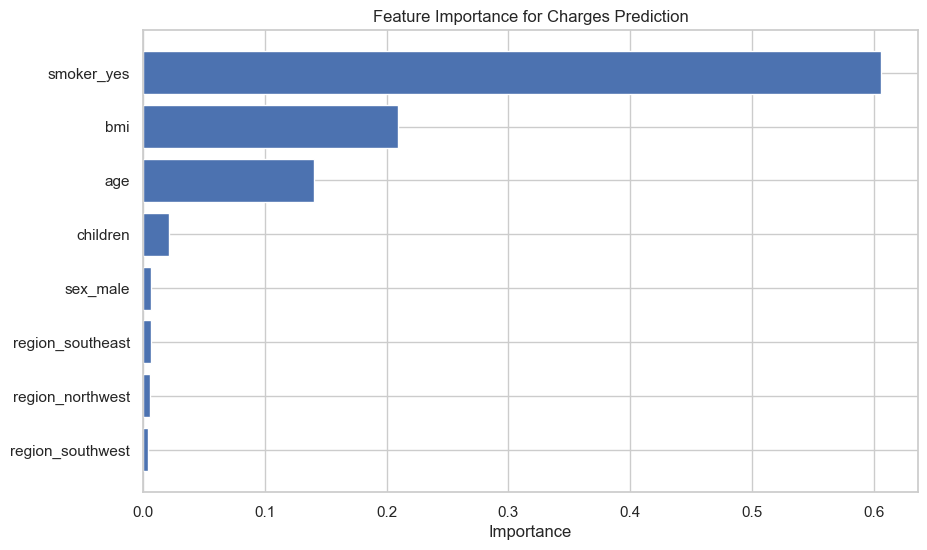

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis() 
plt.xlabel('Importance')
plt.title('Feature Importance for Charges Prediction')
plt.show()


In [ ]:
import joblib


joblib.dump(model, 'full_charges_model.pkl')


['full_charges_model.pkl']